In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
# DAtum, Item Name, Total Products, Quantity
data = pd.read_csv("restaurant-1-orders.csv")
data.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [3]:
#slect only needed columns
data_port = data[["Order Date", "Item Name", "Quantity", "Total products"]]

# drop NaN-Cases
data_port = data_port.dropna()
data_port

,Order Date,Item Name,Quantity,Total products
0,03/08/2019 20:25,Plain Papadum,2,6
1,03/08/2019 20:25,King Prawn Balti,1,6
2,03/08/2019 20:25,Garlic Naan,1,6
3,03/08/2019 20:25,Mushroom Rice,1,6
4,03/08/2019 20:25,Paneer Tikka Masala,1,6
...,...,...,...,...
74813,18/05/2016 18:53,House Red wine 75cl,2,7
74814,14/05/2016 19:28,House Red wine 75cl,2,6
74815,10/05/2016 13:18,House Red wine 75cl,2,9
74816,07/04/2016 19:04,House white wine 75cl,1,6


In [4]:
#change to datetime
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"])
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"], format='%Y%m%d')
#data_port = data_port.set_index('Order Date')

data_port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      74818 non-null  datetime64[ns]
 1   Item Name       74818 non-null  object        
 2   Quantity        74818 non-null  int64         
 3   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.9+ MB


In [5]:
data_ts = data_port
data_ts.head()

,Order Date,Item Name,Quantity,Total products
0,2019-03-08 20:25:00,Plain Papadum,2,6
1,2019-03-08 20:25:00,King Prawn Balti,1,6
2,2019-03-08 20:25:00,Garlic Naan,1,6
3,2019-03-08 20:25:00,Mushroom Rice,1,6
4,2019-03-08 20:25:00,Paneer Tikka Masala,1,6


In [6]:
products = data_ts['Item Name'].unique()
len(products)

248

In [7]:
data_grouped = data_ts.groupby(['Item Name'])['Total products', 'Quantity'].sum()
data_grouped.tail(100)

c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Total products,Quantity
Item Name,,
Methi - Chicken,144,17
Methi - Chicken Tikka,89,5
Methi - King Prawn,66,2
Methi - Lamb,141,15
Methi - Prawn,62,2
...,...,...
Vindaloo - Chicken Tikka,146,17
Vindaloo - King Prawn,192,23
Vindaloo - Lamb,353,55


In [8]:
top_ten = data_grouped.sort_values(by = 'Total products', ascending=False).head(10)
top_ten

,Total products,Quantity
Item Name,,
Pilau Rice,31314,6367
Plain Papadum,27140,10648
Plain Naan,24276,4983
Onion Bhajee,17293,2749
Garlic Naan,17143,3318
Mango Chutney,16991,2504
Plain Rice,15345,2964
Chicken Tikka Masala,14439,2473
Mint Sauce,12615,1840


In [9]:
top_ten_list = top_ten.index.tolist()
top_ten_list

['Pilau Rice',
 'Plain Papadum',
 'Plain Naan',
 'Onion Bhajee',
 'Garlic Naan',
 'Mango Chutney',
 'Plain Rice',
 'Chicken Tikka Masala',
 'Mint Sauce',
 'Bombay Aloo']

In [10]:
i = 'Pilau Rice'
is_i = data_ts['Item Name']==i
data_item = data_ts[is_i]
data_item['Order Date'] = pd.to_datetime(data_item["Order Date"].dt.strftime('%Y-%m-%d'))
data_item_grouped = data_item.groupby(['Order Date'])['Total products'].sum()
date = data_item_grouped.index.tolist()
df_data_item_grouped = data_item_grouped.to_frame()
#print(date)
df_data_item_grouped['Datum'] = date
#data_item_grouped['Order Date'] = data_item_grouped.index
df_data_item_grouped.reset_index(drop=True, inplace=True)
df_data_item_grouped.head()

c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total products,Datum
0,43,2016-01-04
1,13,2016-01-06
2,13,2016-01-09
3,74,2016-01-10
4,11,2016-01-11


In [ ]:
#visconto_train = data_raw.set_index('ADATSOLL').index < "2021-01-01"
#visconto_test = data_raw.set_index('ADATSOLL').index >= "2021-01-01"

In [11]:
df_data_item_grouped.rename(columns= {'Datum':'ds', 'Total products':'y'}, inplace = True)
list = df_data_item_grouped['y']
df_data_item_grouped.pop('y')
df_data_item_grouped['y'] = list
df_data_item_grouped.head()



,ds,y
0,2016-01-04,43
1,2016-01-06,13
2,2016-01-09,13
3,2016-01-10,74
4,2016-01-11,11


In [12]:
data_item.describe()

,Quantity,Total products
count,4721.000000,4721.000000
mean,1.348655,6.632917
std,0.629453,2.893771
min,1.000000,1.000000
25%,1.000000,5.000000
50%,1.000000,6.000000
75%,2.000000,8.000000
max,6.000000,58.000000


In [13]:
for item in top_ten_list:
    is_item = data_ts['Item Name']==item
    data_item = data_ts[is_item]
    data_item['Order Date'] = pd.to_datetime(data_item["Order Date"].dt.strftime('%Y-%m-%d'))
    data_item_grouped = data_item.groupby(['Order Date'])['Total products'].sum()
    date = data_item_grouped.index.tolist()
    df_data_item_grouped = data_item_grouped.to_frame()
    #print(date)
    df_data_item_grouped['Datum'] = date
    #data_item_grouped['Order Date'] = data_item_grouped.index
    df_data_item_grouped.reset_index(drop=True, inplace=True)



    df_data_item_grouped.rename(columns= {'Datum':'ds', 'Total products':'y'}, inplace = True)
    list = df_data_item_grouped['y']
    df_data_item_grouped.pop('y')
    df_data_item_grouped['y'] = list


    m = Prophet()
    m.fit(df_data_item_grouped)


    future_week = m.make_future_dataframe(periods=7)
    future_week.tail(7) 


    forecast_week = m.predict(future_week)

    print(forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))
    


    
    #data frame data_ts nach Item sortieren (bzw. alle anderen Items rausschmeisen, evtl. nach Tag nochmal groupby)      (done)
    # data Frame auf ds und y bezeichnung umschreiben (data_ts.rename(columns= {'Order Date':'ds', 'Total products':'y'}, inplace = True))
    # anschließend Model Training

c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat  yhat_lower  yhat_upper
1101 2019-12-08  37.197059   11.839826   61.501191
1102 2019-12-09  30.996427    7.511669   55.662096
1103 2019-12-10  30.098407    6.473822   56.494827
1104 2019-12-11  31.278824    6.884731   56.031866
1105 2019-12-12  33.846104    8.474001   59.349703
1106 2019-12-13  50.197611   25.669800   75.457713
1107 2019-12-14  57.586043   33.033616   81.488309


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat  yhat_lower  yhat_upper
1019 2019-12-08  38.708594   16.879831   60.910159
1020 2019-12-09  32.343218    9.843360   55.757779
1021 2019-12-10  30.579754    6.608191   53.129140
1022 2019-12-11  31.676588    8.880582   55.435828
1023 2019-12-12  32.485301   10.176686   56.063809
1024 2019-12-13  49.676833   28.637107   71.728822
1025 2019-12-14  56.105475   31.233153   78.479352


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat  yhat_lower  yhat_upper
1073 2019-12-08  25.404581    5.663029   45.042300
1074 2019-12-09  21.072871    1.361205   41.231761
1075 2019-12-10  21.527276    0.947742   42.252592
1076 2019-12-11  23.157917    4.566634   43.133903
1077 2019-12-12  24.334120    4.619209   44.143422
1078 2019-12-13  38.751131   16.967380   57.881207
1079 2019-12-14  40.677338   21.167857   60.368692


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
891 2019-12-08  26.602690    7.958562   43.867026
892 2019-12-09  24.503566    6.977681   42.791897
893 2019-12-10  23.862546    4.840033   41.302356
894 2019-12-11  25.347867    7.755967   43.036998
895 2019-12-12  25.717936    7.310625   43.948296
896 2019-12-13  32.109461   13.456651   50.543661
897 2019-12-14  39.102422   22.245329   57.785449


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
978 2019-12-08  23.074749    8.656067   36.814491
979 2019-12-09  18.450983    3.400446   33.531251
980 2019-12-10  17.809534    2.778926   33.018570
981 2019-12-11  19.570318    3.461714   35.298765
982 2019-12-12  21.039351    6.843895   35.645790
983 2019-12-13  26.799184   11.568424   41.410653
984 2019-12-14  30.215736   15.090593   44.922119


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
858 2019-12-08  24.383756    6.126987   42.834356
859 2019-12-09  21.137712    2.716661   39.287365
860 2019-12-10  19.649316    1.597546   38.429635
861 2019-12-11  20.381198    2.465365   38.072475
862 2019-12-12  20.758412    3.133606   38.138072
863 2019-12-13  31.645241   13.687475   48.600074
864 2019-12-14  34.173817   16.643691   51.968560


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
966 2019-12-08  19.793782    7.156134   32.704025
967 2019-12-09  16.213642    3.723407   29.565719
968 2019-12-10  17.763526    4.355164   31.242274
969 2019-12-11  17.584303    4.382708   30.760793
970 2019-12-12  18.718293    6.723922   32.194819
971 2019-12-13  25.199640   12.720677   38.517140
972 2019-12-14  24.987873   11.620975   38.017441


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
893 2019-12-08  20.010022    5.574096   34.543118
894 2019-12-09  16.790747    2.216466   31.332647
895 2019-12-10  17.595860    3.053797   32.151848
896 2019-12-11  19.734665    6.451238   33.793397
897 2019-12-12  18.916218    5.009048   34.330567
898 2019-12-13  28.673414   13.593624   43.236434
899 2019-12-14  31.321541   16.951390   46.183207


c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       yhat  yhat_lower  yhat_upper
716 2019-12-08  22.745132    8.295703   38.077934
717 2019-12-09  19.583217    4.107023   34.723780
718 2019-12-10  20.413366    5.957818   35.630409
719 2019-12-11  19.591534    3.044032   34.551091
720 2019-12-12  19.476331    4.073962   35.111742
721 2019-12-13  28.849817   13.134691   44.833115
722 2019-12-14  30.411137   16.105216   46.519345
            ds       yhat  yhat_lower  yhat_upper
805 2019-12-08  15.047455    0.327614   29.531783
806 2019-12-09  14.450465    0.455956   27.684643
807 2019-12-10  13.003161   -0.063424   27.195787
808 2019-12-11  14.240993    0.730922   28.205864
809 2019-12-12  12.136965   -1.710682   25.762870
810 2019-12-13  18.795950    5.389553   33.492409
811 2019-12-14  24.596978   10.286669   37.576007


In [14]:
#ts = data_port.groupby("Order Date")["Total products"]
#ts.head()

In [15]:
data_grouped = data_ts.groupby(['Item Name', 'Order Date']).sum('Total products')
data_grouped.tail(100)

Quantity  Total products
Item Name        Order Date                                   
Vindaloo - Lamb  2019-12-03 19:57:00         1               5
Vindaloo - Prawn 2018-05-05 12:56:00         1              60
                 2018-10-16 19:05:00         1               5
                 2018-10-25 17:43:00         1              12
                 2019-02-14 20:31:00         1               7
...                                        ...             ...
Vindaloo Sauce   2019-07-30 21:05:00         1               4
                 2019-08-06 18:20:00         1               5
                 2019-09-06 18:29:00         1               5
                 2019-10-05 18:59:00         1               4
                 2019-11-06 18:21:00         1               5

[100 rows x 2 columns]

In [16]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74441 entries, ('Aloo Chaat', Timestamp('2016-02-08 22:09:00')) to ('Vindaloo Sauce', Timestamp('2019-11-06 18:21:00'))
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Quantity        74441 non-null  int64
 1   Total products  74441 non-null  int64
dtypes: int64(2)
memory usage: 1.5+ MB


In [17]:
data_ts.rename(columns= {'Order Date':'ds', 'Total products':'y'}, inplace = True)

In [18]:
data_ts.head()

,ds,Item Name,Quantity,y
0,2019-03-08 20:25:00,Plain Papadum,2,6
1,2019-03-08 20:25:00,King Prawn Balti,1,6
2,2019-03-08 20:25:00,Garlic Naan,1,6
3,2019-03-08 20:25:00,Mushroom Rice,1,6
4,2019-03-08 20:25:00,Paneer Tikka Masala,1,6


In [19]:
m = Prophet()
m.fit(data_ts)

In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
13441,2020-12-02 22:24:00
13442,2020-12-03 22:24:00
13443,2020-12-04 22:24:00
13444,2020-12-05 22:24:00
13445,2020-12-06 22:24:00


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
13441,2020-12-02 22:24:00,5.240795,-3.312905,13.641379
13442,2020-12-03 22:24:00,5.096716,-2.981666,14.083864
13443,2020-12-04 22:24:00,6.095699,-1.663281,14.946185
13444,2020-12-05 22:24:00,6.198232,-2.215946,14.825283
13445,2020-12-06 22:24:00,5.414730,-3.037869,14.055215


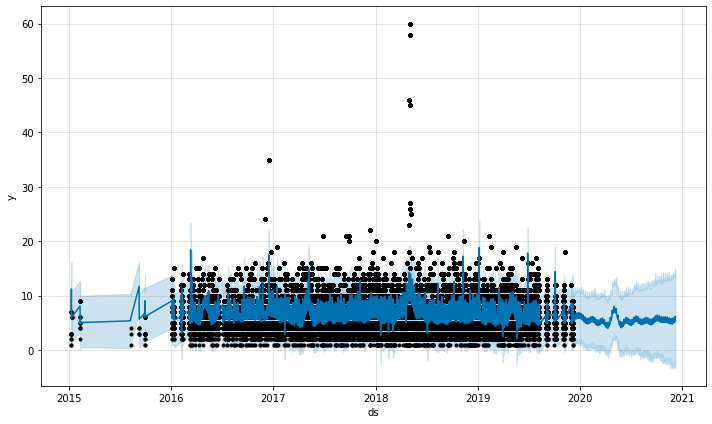

In [22]:
fig1 = m.plot(forecast)

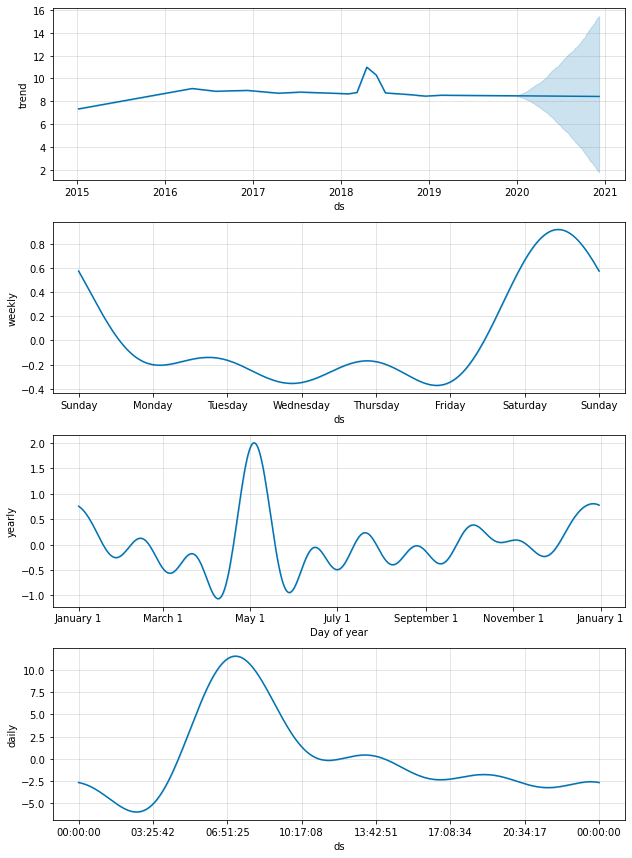

In [23]:
fig2 = m.plot_components(forecast)


## Predict one week

In [24]:
future_week = m.make_future_dataframe(periods=7)
future_week.tail(7)

,ds
13081,2019-12-08 22:24:00
13082,2019-12-09 22:24:00
13083,2019-12-10 22:24:00
13084,2019-12-11 22:24:00
13085,2019-12-12 22:24:00
13086,2019-12-13 22:24:00
13087,2019-12-14 22:24:00


In [25]:
forecast_week = m.predict(future_week)

In [26]:
forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
13081,2019-12-08 22:24:00,5.536651,0.570579,10.253015
13082,2019-12-09 22:24:00,5.623116,0.947844,10.663598
13083,2019-12-10 22:24:00,5.470320,0.678999,10.593287
13084,2019-12-11 22:24:00,5.700041,0.716739,10.198118
13085,2019-12-12 22:24:00,5.553552,0.723806,10.450775
13086,2019-12-13 22:24:00,6.546179,1.751726,10.955159
13087,2019-12-14 22:24:00,6.638751,1.837780,11.536614


In [27]:
#fig1 = m.plot(forecast_week)

In [28]:
tail = forecast_week['yhat'].tail(7)
vorhersage = forecast_week['yhat'].tolist()
vorhersage

[7.285471668722211,
 11.23605856752107,
 10.780675005836297,
 8.9495902619048,
 7.138916793467985,
 6.263694406862973,
 6.2507432522406745,
 5.956408005853745,
 8.113671352770389,
 7.213830771102398,
 6.589936552141842,
 4.8403974753568395,
 5.0455610164030205,
 5.365057464990859,
 5.485463857321316,
 5.661274554299272,
 11.685441272421581,
 7.474412037061662,
 7.47568212697875,
 8.017729610404201,
 7.003200809141401,
 5.65713230649998,
 6.795921109035788,
 6.501912029841094,
 6.022258639385267,
 9.04221300100723,
 6.642953834889182,
 6.465141084867352,
 6.14249992124892,
 9.041315310664618,
 9.127943029480766,
 7.464781528779705,
 7.456849093388819,
 7.1924154559024895,
 6.9110791257828055,
 6.885226293166525,
 6.580870799838653,
 6.099774224101283,
 6.026723923946767,
 7.211711900957207,
 5.770571839528265,
 6.78599294463895,
 6.803957174678442,
 6.866701947100859,
 7.112490266099664,
 6.046106596457532,
 8.083495504468619,
 8.068286570980153,
 6.811824001822291,
 9.584986699654422,


In [29]:
tail = forecast_week['yhat'].tail(7)
vorhersage = tail.tolist()
vorhersage

[5.536651398428474,
 5.623116193617774,
 5.470319584577764,
 5.700040519872582,
 5.553552219772976,
 6.546179383098091,
 6.638751458651194]

## Quellen

https://facebook.github.io/prophet/docs/quick_start.html



https://www.youtube.com/watch?v=KvLG1uTC-KU
